# SDS 326E Final Project
# Classifying Protein Clans
#### Vibhav Setlur, Ryan Nguyen, Krishna Pakala

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [ ]:
data = '~/Downloads/UT_Austin/Spring_2025/SDS_326E_Elements_of_Machine_Learning/Final_Project/Data/Protein_Family_Dataset_Cleaned.csv'
df = pd.read_csv(data, index_col = 0)
df

,Length,Sequence,Genome_Location,Mass,Repeat,Motif,Chain,Mutagenesis,Region,Topological domain,...,Coiled coil,Non,Initiator methionine,Transit peptide,Cross,Propeptide,Lipidation,Intramembrane,Peptide,Protein_Clan
Protein_Name,,,,,,,,,,,,,,,,,,,,,
Protein PIGBOS1 (PIGB opposite strand protein 1),54,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,Chromosome 15,6313,0,0,1,8,1,2,...,0,0,0,0,0,0,0,0,0,AT14A-like
Ciliated left-right organizer metallopeptidase (EC 3.4.24.-) (Leishmanolysin-like peptidase 2),788,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,Chromosome 14,85397,0,0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,HTH
Solute carrier family 12 member 8 (Cation-chloride cotransporter 9),714,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...,Chromosome 3,78239,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,MFS
RNA-binding protein 47 (RNA-binding motif protein 47),593,MTAEDSTAAMSSDSAAGSSAKVPEGVAGAPNEAALLALMERTGYSM...,Chromosome 4,64099,0,0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,Golgi-transport
Extended synaptotagmin-2 (E-Syt2) (Chr2Syt),921,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,Chromosome 7,102357,0,0,1,5,3,3,...,0,0,0,0,0,0,0,0,0,TPR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tetratricopeptide repeat protein 34 (TPR repeat protein 34),566,MLQRSPRAGPSRAQGRREAAETGGPTTQEGVACGVHQLATLLMELD...,Chromosome 1,60903,8,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,TPR
IQ domain-containing protein F6,107,MVRRTLLQAALRAWVIQCWWRSMQAKMLEQRRRLALRLYTCQEWAV...,Chromosome 3,13059,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,AVL9
Putative uncharacterized protein C5orf58,81,MGKKRVTDHKLNVDKVIKNINTISSELKKIKELSQLLLCDLILHFN...,Chromosome 5,9231,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,TPR


#### Data Check

In [ ]:
# Check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8051 entries, Protein PIGBOS1 (PIGB opposite strand protein 1) to Putative uncharacterized protein FLJ31958
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Length                8051 non-null   int64 
 1   Sequence              8051 non-null   object
 2   Genome_Location       8051 non-null   object
 3   Mass                  8051 non-null   int64 
 4   Repeat                8051 non-null   int64 
 5   Motif                 8051 non-null   int64 
 6   Chain                 8051 non-null   int64 
 7   Mutagenesis           8051 non-null   int64 
 8   Region                8051 non-null   int64 
 9   Topological domain    8051 non-null   int64 
 10  Transmembrane         8051 non-null   int64 
 11  Natural variant       8051 non-null   int64 
 12  Alternative sequence  8051 non-null   int64 
 13  Disulfide bond        8051 non-null   int64 
 14  Domain   

In [ ]:
# View summary statistics of the dataset
df.describe()

,Length,Mass,Repeat,Motif,Chain,Mutagenesis,Region,Topological domain,Transmembrane,Natural variant,...,DNA binding,Coiled coil,Non,Initiator methionine,Transit peptide,Cross,Propeptide,Lipidation,Intramembrane,Peptide
count,8051.000000,8.051000e+03,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,...,8051.000000,8051.000000,8051.0,8051.000000,8051.000000,8051.0,8051.000000,8051.000000,8051.000000,8051.000000
mean,601.162588,6.692697e+04,0.890324,0.215501,1.055397,1.940628,1.832692,0.905726,0.965346,5.125947,...,0.022357,0.138492,0.0,0.112657,0.030555,0.0,0.047696,0.065209,0.023103,0.018631
std,597.158303,6.574014e+04,3.523200,0.677876,0.370209,5.173314,2.856042,2.455048,2.572413,17.481725,...,0.189794,0.544946,0.0,0.321646,0.172840,0.0,0.237922,0.343668,0.250640,0.336811
min,25.000000,3.456000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,273.000000,3.047450e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,445.000000,4.967100e+04,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,716.500000,8.022950e+04,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,14507.000000,1.519175e+06,62.000000,16.000000,13.000000,129.000000,112.000000,29.000000,36.000000,485.000000,...,6.000000,13.000000,0.0,3.000000,2.000000,0.0,5.000000,6.000000,7.000000,18.000000


In [ ]:
# Find number of unique values in each column
df.nunique()

Length                  1678
Sequence                8047
Genome_Location           28
Mass                    7770
Repeat                    44
Motif                     12
Chain                     10
Mutagenesis               54
Region                    31
Topological domain        19
Transmembrane             20
Natural variant          119
Alternative sequence      24
Disulfide bond            53
Domain                    37
Glycosylation             46
Signal                     2
Site                      15
Active site                8
Binding site              38
Sequence conflict         38
Compositional bias        39
Beta strand               94
Helix                     87
Modified residue          58
Turn                      34
Zinc finger               21
DNA binding                6
Coiled coil               11
Non                        1
Initiator methionine       4
Transit peptide            3
Cross                      1
Propeptide                 4
Lipidation    

In [14]:
df.isna().sum()

Length                  0
Sequence                0
Genome_Location         0
Mass                    0
Repeat                  0
Motif                   0
Chain                   0
Mutagenesis             0
Region                  0
Topological domain      0
Transmembrane           0
Natural variant         0
Alternative sequence    0
Disulfide bond          0
Domain                  0
Glycosylation           0
Signal                  0
Site                    0
Active site             0
Binding site            0
Sequence conflict       0
Compositional bias      0
Beta strand             0
Helix                   0
Modified residue        0
Turn                    0
Zinc finger             0
DNA binding             0
Coiled coil             0
Non                     0
Initiator methionine    0
Transit peptide         0
Cross                   0
Propeptide              0
Lipidation              0
Intramembrane           0
Peptide                 0
Protein_Clan            0
dtype: int64

In [25]:
df['Protein_Clan'].value_counts()

Protein_Clan
TPR               420
HTH               397
E-set             379
Beta_propeller    236
P-loop_NTPase     193
                 ... 
CBD                 1
SufE_NifU           1
Beta_tulip          1
SDH_alpha           1
Aerolisin_ETX       1
Name: count, Length: 482, dtype: int64

In [ ]:
# Filter for clans with more than 5 proteins
df = df[df['Protein_Clan'].map(df['Protein_Clan'].value_counts()) > 5]

### EDA

### Basic Machine Learning Models

#### Protein Sequence based Machine Learning Models
- Naive Bayes Classifier using protein sequence only

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.pipeline import make_pipeline

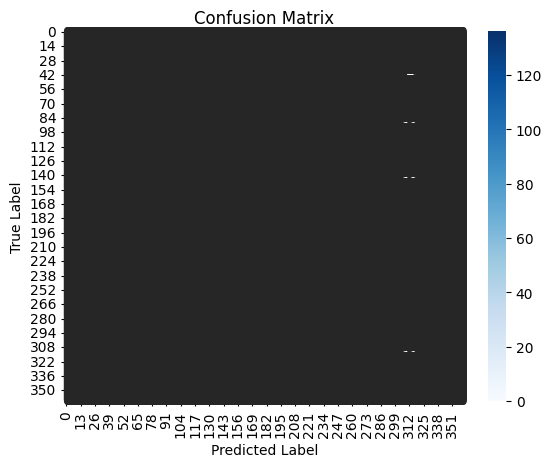


Accuracy: 0.048013245033112585


In [24]:
x = df['Sequence']
y = df['Protein_Clan']

# Vectorize the text data
vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size = 0.3, random_state = 42)

# Create and train the Naive Bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print the model performance metrics
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print()

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')